# Decision Tree

In [1]:
import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('./dataset/train_data.csv')
test = pd.read_csv('./dataset/test_data.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   body_length              8000 non-null   float64
 1   body_width               8000 non-null   float64
 2   body_height              8000 non-null   float64
 3   wavyfin_length           8000 non-null   float64
 4   wavyfin_width            8000 non-null   float64
 5   wavyfin_height           8000 non-null   float64
 6   pipe1_length             8000 non-null   float64
 7   pipe1_width              8000 non-null   float64
 8   pipe1_height             8000 non-null   float64
 9   pipe2_length             8000 non-null   float64
 10  pipe2_width              8000 non-null   float64
 11  pipe2_height             8000 non-null   float64
 12  flange1_length           8000 non-null   float64
 13  flange1_width            8000 non-null   float64
 14  flange1_height          

In [5]:
test.info() # null 값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   body_length              2000 non-null   float64
 1   body_width               2000 non-null   float64
 2   body_height              2000 non-null   float64
 3   wavyfin_length           2000 non-null   float64
 4   wavyfin_width            2000 non-null   float64
 5   wavyfin_height           2000 non-null   float64
 6   pipe1_length             2000 non-null   float64
 7   pipe1_width              2000 non-null   float64
 8   pipe1_height             2000 non-null   float64
 9   pipe2_length             2000 non-null   float64
 10  pipe2_width              2000 non-null   float64
 11  pipe2_height             2000 non-null   float64
 12  flange1_length           2000 non-null   float64
 13  flange1_width            2000 non-null   float64
 14  flange1_height          

In [6]:
X_train = train.drop(['op10_test', 'op10_time_series', 'op20_test', 'op20_time_series',
                            'op30_test', 'op30_time_series', 'op40_test', 'op40_time_series', 
                            'op50_test', 'op50_time_series', 'op60_test', 
                            'op40_length', 'op40_width', 'op40_height', 
                            'op40_light_sensor', 'op40_temperature', 'op40_scratch', 'op40_operator', 
                            'op50_length', 'op50_width', 'op50_height',
                            'op50_light_sensor', 'op50_temperature', 'op50_scratch', 'op50_operator',
                            'op60_length', 'op60_width', 'op60_height', 
                            'op60_light_sensor', 'op60_scratch', 'uniform_distribution'], axis = 1) # train data에서 op 10 ~ 30의 NaN 값, op 40 ~ 60의 불필요한 칼럼을 drop으로 삭제
X_train.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,...,op20_light_sensor,op20_scratch,op20_operator,op30_length,op30_width,op30_height,op30_electricity_sensor,op30_light_sensor,op30_scratch,op30_operator
0,199.996,100.002,50.001,100.000,49.997,59.997,30.000,50.003,29.996,30.000,...,0,1,1,199.995873,180.106820,59.996905,94.711471,0,1,1
1,200.002,100.000,49.998,99.999,50.002,60.000,29.999,49.994,29.999,30.007,...,0,1,1,200.001735,179.993792,59.999933,94.880748,0,1,1
2,199.998,100.000,49.998,100.003,50.003,59.998,29.995,50.002,30.000,30.003,...,0,1,1,199.997595,180.007309,59.997682,92.783317,0,1,1
3,200.002,100.000,50.000,100.000,50.003,60.000,30.001,49.995,29.998,30.002,...,0,1,1,200.001981,179.995833,60.000453,93.951689,0,1,1
4,200.001,100.001,49.999,100.003,49.997,59.996,30.000,50.001,29.996,30.002,...,0,1,1,200.001256,180.005777,59.995941,90.609768,0,1,1


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   body_length              8000 non-null   float64
 1   body_width               8000 non-null   float64
 2   body_height              8000 non-null   float64
 3   wavyfin_length           8000 non-null   float64
 4   wavyfin_width            8000 non-null   float64
 5   wavyfin_height           8000 non-null   float64
 6   pipe1_length             8000 non-null   float64
 7   pipe1_width              8000 non-null   float64
 8   pipe1_height             8000 non-null   float64
 9   pipe2_length             8000 non-null   float64
 10  pipe2_width              8000 non-null   float64
 11  pipe2_height             8000 non-null   float64
 12  flange1_length           8000 non-null   float64
 13  flange1_width            8000 non-null   float64
 14  flange1_height          

In [8]:
Y_train = train['op60_test'] # train data에서 op60_test를 라벨 값으로 사용
Y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: op60_test, dtype: int64

In [9]:
X_test = test.drop(['op10_test', 'op10_time_series', 'op20_test', 'op20_time_series',
                            'op30_test', 'op30_time_series', 'op40_test', 'op40_time_series', 
                            'op50_test', 'op50_time_series', 'op60_test', 
                            'op40_length', 'op40_width', 'op40_height', 
                            'op40_light_sensor', 'op40_temperature', 'op40_scratch', 'op40_operator', 
                            'op50_length', 'op50_width', 'op50_height',
                            'op50_light_sensor', 'op50_temperature', 'op50_scratch', 'op50_operator',
                            'op60_length', 'op60_width', 'op60_height', 
                            'op60_light_sensor', 'op60_scratch', 'uniform_distribution'], axis = 1) # test data에서 op 10 ~ 30의 NaN 값, op 40 ~ 60의 불필요한 칼럼을 drop으로 삭제
X_test.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,...,op20_light_sensor,op20_scratch,op20_operator,op30_length,op30_width,op30_height,op30_electricity_sensor,op30_light_sensor,op30_scratch,op30_operator
0,199.997,99.999,50.003,100.000,50.005,60.003,29.996,50.004,30.002,29.998,...,0,1,3,199.997061,180.005558,60.002786,95.000563,0,1,3
1,199.999,100.001,50.002,99.996,50.000,60.004,29.998,50.004,29.995,30.000,...,0,1,3,199.999360,180.005180,60.003705,91.815773,0,1,3
2,199.999,100.001,50.002,100.001,50.001,60.003,29.997,50.001,30.003,30.001,...,0,1,3,199.999315,180.004519,60.002609,94.368763,0,1,3
3,200.002,99.996,49.999,100.001,49.998,60.000,30.000,50.006,30.001,30.001,...,0,1,3,200.002048,180.001510,59.999508,96.679591,0,1,3
4,199.999,100.003,50.003,100.000,50.001,60.000,30.000,49.998,30.002,30.001,...,0,1,3,199.999422,180.001309,59.999977,94.037526,0,1,3


In [10]:
Y_test = test['op60_test'] # test data에서 op60_test 칼럼을 test label 값으로 사용
Y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: op60_test, dtype: int64

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   body_length              2000 non-null   float64
 1   body_width               2000 non-null   float64
 2   body_height              2000 non-null   float64
 3   wavyfin_length           2000 non-null   float64
 4   wavyfin_width            2000 non-null   float64
 5   wavyfin_height           2000 non-null   float64
 6   pipe1_length             2000 non-null   float64
 7   pipe1_width              2000 non-null   float64
 8   pipe1_height             2000 non-null   float64
 9   pipe2_length             2000 non-null   float64
 10  pipe2_width              2000 non-null   float64
 11  pipe2_height             2000 non-null   float64
 12  flange1_length           2000 non-null   float64
 13  flange1_width            2000 non-null   float64
 14  flange1_height          

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [13]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=11)

In [14]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.9810
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 11, 'splitter': 'best'}


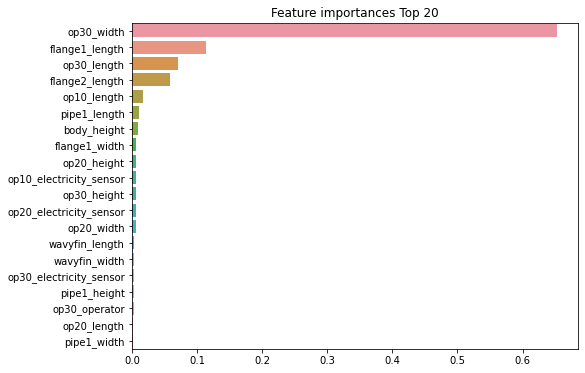

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = dt_clf.feature_importances_ # 각 칼럼별 정확도에 영향을 미치는 정도 확인
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20] # 상위 20개만 추출

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20 , y = ftr_top20.index)
plt.show()